# MiCM Workshop Series - R Programming Beyond the Basics
## Efficient Coding and Computing
### - Yi Lian
### - August 13, 2019
__Link to workshop material__  https://github.com/ly129/MiCM

<a id='0'></a>
## Outline
**_Morning_**
1. [__An overview of efficiency__](#1)
    - General rules
    - R-specific rules
    - Time your program in R
        - Illustrations of the rules
2. [__Efficient coding__](#2)
    - Powerful functions in R
            - aggregate(), by(), apply() family
            - ifelse(), cut() and split()
    - Write our own functions in R
            - function()
    - Examples and exercises
         - Categorization, conditional operations, etc..
        
**_Afternoon_**
3. [__Efficient computing__](#3)
    - Parallel computing
            - Package 'parallel'
    - Integration with C++
            - Package 'Rcpp'
    - Integration with Fortran
         
4. [__Exercises__](#4)
    - Examples and exercises
         - Implement our own functions written in R, Rcpp or Fortran!
        
##### Important note! There are MANY advanced and powerful packages that do different things. There are too many and they are too diverse to be covered in this workshop.
___Here is a list of some awesome packages.___ https://awesome-r.com/

<a id='1'></a>
## 1. [An overview of efficiency](#0)
__Why?__

- Clean and tidy codes make everything easier - edit, debug, reproduce, etc..
- Era of big data/machine learning/AI
- Large sample size and/or high dimension

### 1.1 General rules
- All operations take time (CPU)
- Reading/writing data takes time
    - Memory allocation and re-allocation
    - A not really appropriate illustration
    <img src="sd.png" alt="Drawing" style="width: 120px;"/>
- Objects and operations take memory
    - http://adv-r.had.co.nz/memory.html
    - e.g. R will do "garbage collection" automatically when it needs more memory, which takes time
- Setups take time (overhead)
- Programming languages are different and are fast/slow at different things
- __Efficient coding $\neq$ efficient computing__
    - Shorter codes do not necessarily lead to shorter run time.
- __Avoid duplicated operations, especially expensive operations__
    - Matrix mulplications, inversion, etc..
    - Store the results that will be used later as objects.
- __Test your program__

### 1.2 R-specific rules
- R emphasizes flexibility but not speed
    - Very good for research
- R is designed to be better with __vectorized__ operations than loops
- Without specific setups, R only uses 1 __CPU__ core
    - Setting up parallel (multicore) computing takes time (overhead)
- Use well-developped R functions and packages
    - Some of them have core computations written in other languages, e.g. C, C++, Fortran
    - These functions usually make coding and computing more efficient at the same time.


##### Detailed illustration in 1.3 Time your program in R.

#### 1.2.1 To understand vectorized operations and to facilitate integration with other programs, we need to know R data types and structures
##### R data types
    - numeric
        - integer
        - double (default)
    - logical
    - character
    - factor
    - ...

In [1]:
# double
class(5); is.double(5)

[1] "numeric"

[1] TRUE

In [2]:
# integer
class(5L); is.double(5L)

[1] "integer"

[1] FALSE

In [3]:
object.size(rep(5, 1000))
object.size(rep(5L, 1000))

8048 bytes

4048 bytes

In [4]:
# How precise is double precision?
options(digits = 22) # show more digits in output
print(1/3)
options(digits = 7) # default

[1] 0.3333333333333333148296


In [5]:
# logical
class(TRUE); class(F)

[1] "logical"

[1] "logical"

In [6]:
# character
class("TRUE")

[1] "character"

In [7]:
# Not important for this workshop
fac <- as.factor(c(1, 5, 11, 3))
fac

[1] 1  5  11 3 
Levels: 1 3 5 11

In [8]:
class(fac)

[1] "factor"

In [9]:
fac.ch <- as.factor(c("B", "a", "1", "ab", "b", "A"))
fac.ch

[1] B  a  1  ab b  A 
Levels: 1 a A ab b B

##### R data structures
    - Scalar *
    - Vector
    - Matrix
    - Array
    - List
    - Data frame
    - ...

In [10]:
# Scalar - a vector of length 1
myscalar <- 5
myscalar

[1] 5

In [11]:
class(myscalar)

[1] "numeric"

In [12]:
# Vector
myvector <- c(1, 1, 2, 3, 5, 8)
myvector

[1] 1 1 2 3 5 8

In [13]:
class(myvector)

[1] "numeric"

In [14]:
# Matrix - a 2d array
mymatrix <- matrix(c(1, 1, 2, 3, 5, 8), nrow = 2, byrow = FALSE)
mymatrix

1,2,5
1,3,8


In [15]:
class(mymatrix)

[1] "matrix"

In [16]:
# Array - not important for this workshop
myarray <- array(c(1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144), dim = c(2, 2, 3))
print(myarray) # print() is not needed if run in R or Rstudio.

, , 1

     [,1] [,2]
[1,]    1    2
[2,]    1    3

, , 2

     [,1] [,2]
[1,]    5   13
[2,]    8   21

, , 3

     [,1] [,2]
[1,]   34   89
[2,]   55  144



In [17]:
class(myarray)

[1] "array"

In [1]:
# List - very important for the workshop
mylist <- list(Title = "Efficient Coding and Computing",
               Duration = c(3, 3),
               sections = as.factor(c(1, 2, 3, 4)),
               Date = as.Date("2019-08-13"),
               Lunch_provided = TRUE,
               Feedbacks = c("Amazing!", "Great workshop!", "Yi is the best!", "Wow!")
)
print(mylist) # No need for print if running in R or Rstudio

$Title
[1] "Efficient Coding and Computing"

$Duration
[1] 3 3

$sections
[1] 1 2 3 4
Levels: 1 2 3 4

$Date
[1] "2019-08-13"

$Lunch_provided
[1] TRUE

$Feedbacks
[1] "Amazing!"        "Great workshop!" "Yi is the best!" "Wow!"           



In [19]:
class(mylist)

[1] "list"

In [20]:
# Access data stored in lists
mylist$Title

[1] "Efficient Coding and Computing"

In [21]:
# or
mylist[[6]]

[1] "Amazing!"        "Great workshop!" "Yi is the best!" "Wow!"

In [22]:
# Further
mylist$Duration[1]
mylist[[6]][2]

[1] 3

[1] "Great workshop!"

In [23]:
# Elements in lists can have different data types
lapply(mylist, class) # We will talk about lapply() later

$Title
[1] "character"

$Duration
[1] "numeric"

$sections
[1] "factor"

$Date
[1] "Date"

$Lunch_provided
[1] "logical"

$Feedbacks
[1] "character"

In [24]:
# Elements in list can have different lengths
lapply(mylist, length)

$Title
[1] 1

$Duration
[1] 2

$sections
[1] 4

$Date
[1] 1

$Lunch_provided
[1] 1

$Feedbacks
[1] 4

In [25]:
# Data frames - most commonly used for analyses
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [26]:
# Access a column (variable) in data frames
mtcars$mpg

[1] 21.0 21.0 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2 10.4
[16] 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.0 30.4 15.8 19.7
[31] 15.0 21.4

#### 1.2.2 To show CPU usage

In [27]:
# Let's try to invert a large matrix.
A <- diag(4000)
# A.inv <- solve(A)

#### 1.2.3 To show integration with other languages

In [3]:
# optim() in R calls C programs, run optim to see source code.
# optim

### 1.3 Time your program in R
        - proc.time(), system.time()
        - microbenchmark()
        
___Illustrations of R rules for efficiency.___

__Example__
Calculate the square root of 1 to 1,000,000 using three different operations:
#### 1. Vectorized

In [29]:
# Vectorized operation
t <- system.time( x1 <- sqrt(1:1000000) )
head(x1)

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490

#### 2. For loop with memory pre-allocation

In [30]:
# We can do worse
# For loop with memory pre-allocation
x2 <- rep(NA, 1000000)
t0 <- proc.time()
for (i in 1:1000000) {
    x2[i] <- sqrt(i)
}
t1 <- proc.time()

identical(x1, x2) # Check whether results are the same

[1] TRUE

#### 3. For loop without memory pre-allocation

In [31]:
# Even worse
# For loop without memory pre-allocation
x3 <- NULL
t2 <- proc.time()
for (i in 1:1000000) {
    x3[i] <- sqrt(i)
}
t3 <- proc.time()

identical(x2, x3) # Check whether results are the same

[1] TRUE

In [32]:
# As we can see, R is not very good with loops.
t; t1 - t0; t3 - t2
# ?proc.time

   user  system elapsed 
  0.006   0.005   0.011 

   user  system elapsed 
  0.071   0.004   0.076 

   user  system elapsed 
  0.294   0.072   0.369 

##### How did R execute these three sets of codes?
The better we know how programming languages work, how computers work in general, the better codes we can write.
1. Vectorized
        x1 <- sqrt(1:1000000)
        
        - sqrt 1, sqrt 2, ..., sqrt 1e6
        - Save everything in x1 and put it in memory.
2. For loop with memory pre-allocation
        x2 <- rep(NA, 1000000)
        for (i in 1:1000000) { x2[i] <- sqrt(i) }

        - Make a vector x2 of length 1e6 and set all elements to NA.
        - Put it in memory.
        - Setup for loop.
        - 1st step
            - Find x2 in memory
            - Change the 1st element to sqrt 1
            - Put new x2 back in memory, delete old x2
        - 2nd step
            - Find x2 in memory
            - Change the 2nd element to sqrt 2
            - Put new x2 back in memory, delete old x2
        - ...
        - - 1e6th step
            - Find x2 in memory
            - Change the 1e6th element to sqrt 1e6
            - Put new x2 back in memory, delete old x2
3. For loop without memory pre-allocation
        x3 <- NULL
        for (i in 1:1000000) { x3[i] <- sqrt(i) }
 
        - Make an empty object x3 (NULL has length 0)
        - Put it in memory
        - Setup for loop.
        - 1st step
            - Find x3 in memory
            - Change the 1st element to .., wait x3 has length 0
            - Make a new x3 that has length 1
            - Change the 1st element to sqrt 1
            - Put new x3 back in memory.., wait
                The memory allocated for old x3 is not enough for new x3
            - Find some new space in memory for new x3
            - Put new x3 back in memory, delete old x3
        - 2nd step
            - Find x3 in memory
            - Change the 2nd element to .., wait x3 has length 1
            - Make a new x3 that has length 2
            - Copy the old x3 and paste as the first 1 element of new x3
            - Change the 2nd element to sqrt 2
            - Put new x3 back in memory.., wait
                The memory allocated for old x3 is not enough for new x3
            - Find some new space in memory for new x3
            - Put new x3 back in memory, delete old x3
        - ...
        - 1e6th step
            - Find x3 in memory
            - Change the 1e6th element to .., wait x3 has length 999999
            - Make a new x3 that has length 1e6
            - Copy the old x3 and paste as the first 999999 elements of new x3
            - Change the 1e6th element to sqrt 1e6
            - Put new x3 back in memory.., wait
                The memory allocated for old x3 is not enough for new x3
            - Find some new space in memory for new x3..
            - Put new x3 back in memory, delete old x3
            
___As a result, there will not be a lot of loops in this workshop.___

##### However, I still use the third one sometimes.
- Speed is not always my major concern. Especially if I am only executing the code once. Or I am working on reasonably sized data and/or fairly inexpensive computations.
- Typing takes time too. Compare NULL vs. rep(NA, 1000000)
        - capslock, n, u, l, l
        - r, e, p, shift + 9, shift + n, shift + a, , , 1000000, shift + 0
- Thinking takes time as well. Loop is more intuitive. Sometimes I have to think to get the size of the result object because it can be matrices, arrays, etc.
        - matrix(rep(NA, n * p), nrow = n)

##### Take-home message
- Use vectorized operations rather than loops for speed.
- Balance between speed, your need for speed, your own laziness, etc.., based on what you are doing.

In [33]:
# microbenchmark runs the code multiple times and take a summary
library(microbenchmark)
result <- microbenchmark(sqrt(1:1000000),
                         for (i in 1:1000000) {x2[i] <- sqrt(i)},
                         unit = "s", times = 20
                        )
summary(result)
# Result in seconds

expr,min,lq,mean,median,uq,max,neval
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sqrt(1:1e+06),0.003910112,0.004903612,0.007846455,0.005464531,0.01071618,0.01427238,20
for (i in 1:1e+06) { x2[i] <- sqrt(i) },0.059107341,0.059319024,0.069171916,0.059795169,0.07439276,0.11318731,20


__Example__
Calculate the square root using sqrt( ) vs. our own implementation.

In [34]:
# Use well-developped R functions
result <- microbenchmark(sqrt(500),
                         500^0.5,
                         unit = "ns", times = 1000
                        )
summary(result)
# Result in nanoseconds

expr,min,lq,mean,median,uq,max,neval
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sqrt(500),118,152,176.687,168,185,1583,1000
500^0.5,209,263,309.043,291,319,11331,1000


##### In summary, keep the rules in mind, know what you want to do, test your program, time your program.

<a id='2'></a>
## 2. [Efficient coding](#0)
R has many powerful and useful functions that we can use to achieve efficient coding and computing.
### 2.1 Powerful functions in R
##### Let's play with some data.

In [151]:
data <- read.csv("https://raw.githubusercontent.com/ly129/MiCM/master/sample.csv", header = TRUE)
head(data, 10)

X,Sex,Wr.Hnd,NW.Hnd,Pulse,Smoke,Height,Age
<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>
1,Male,21.4,21.0,63,Never,180.00,19.000
2,Male,19.5,19.4,79,Never,165.00,18.083
3,Female,16.3,16.2,44,Regul,152.40,23.500
4,Female,15.9,16.5,99,Never,167.64,17.333
5,Male,19.3,19.4,55,Never,180.34,19.833
6,Male,18.5,18.5,48,Never,167.00,22.333
7,Female,17.5,17.0,85,Heavy,163.00,17.667
8,Male,19.8,20.0,NA,Never,180.00,17.417
9,Female,13.0,12.5,77,Never,165.00,18.167


In [36]:
summary(data)

       X              Sex         Wr.Hnd          NW.Hnd          Pulse       
 Min.   :  1.00   Female:47   Min.   :13.00   Min.   :12.50   Min.   : 40.00  
 1st Qu.: 25.75   Male  :53   1st Qu.:17.50   1st Qu.:17.45   1st Qu.: 50.25  
 Median : 50.50               Median :18.50   Median :18.50   Median : 71.50  
 Mean   : 50.50               Mean   :18.43   Mean   :18.39   Mean   : 69.90  
 3rd Qu.: 75.25               3rd Qu.:19.50   3rd Qu.:19.52   3rd Qu.: 84.75  
 Max.   :100.00               Max.   :23.20   Max.   :23.30   Max.   :104.00  
                                                              NA's   :6       
   Smoke        Height           Age       
 Heavy: 6   Min.   :152.0   Min.   :16.92  
 Never:79   1st Qu.:166.4   1st Qu.:17.58  
 Occas: 5   Median :170.2   Median :18.46  
 Regul:10   Mean   :171.8   Mean   :20.97  
            3rd Qu.:179.1   3rd Qu.:20.21  
            Max.   :200.0   Max.   :73.00  
            NA's   :13                     

#### a1. Calculate the mean writing hand span of all individuals
    mean(x, trim = 0, na.rm = FALSE, ...)

In [5]:
mean(data$Wr.Hnd)

[1] 18.43

#### a2. Calculate the mean height of all individuals, exclude the missing values

In [7]:
mean(data$Height)
?mean

[1] NA

In [8]:
mean(data$Height, na.rm = TRUE)

[1] 171.7846

#### a3. Calculate the mean of all continuous variables
    apply(X, MARGIN, FUN, ...)

In [9]:
cts.var <- sapply(X = data, FUN = is.double) # We'll talk about sapply later.
cts <- data[ , cts.var]
head(cts)
?apply

Wr.Hnd,NW.Hnd,Height,Age
<dbl>,<dbl>,<dbl>,<dbl>
21.4,21.0,180.00,19.000
19.5,19.4,165.00,18.083
16.3,16.2,152.40,23.500
15.9,16.5,167.64,17.333
19.3,19.4,180.34,19.833
18.5,18.5,167.00,22.333


In [10]:
apply(X = cts, MARGIN = 2, FUN = mean)

Wr.Hnd   NW.Hnd   Height      Age 
18.43000 18.39100       NA 20.96503

In [11]:
apply(X = cts, MARGIN = 2, FUN = mean, na.rm = T)

Wr.Hnd    NW.Hnd    Height       Age 
 18.43000  18.39100 171.78460  20.96503

#### b1. Calculate the count/proportion of females and males
    table(...,
      exclude = if (useNA == "no") c(NA, NaN),
      useNA = c("no", "ifany", "always"),
      dnn = list.names(...), deparse.level = 1)

    prop.table()

In [14]:
fm <- table(data$Sex)
fm


Female   Male 
    47     53 

In [15]:
class(fm)

[1] "table"

In [18]:
fm/length(data$Sex)


Female   Male 
  0.47   0.53 

In [19]:
prop.table(fm)


Female   Male 
  0.47   0.53 

#### b2. Calculate the count in each Smoke group

In [20]:
table(data$Smoke)


Heavy Never Occas Regul 
    6    79     5    10 

#### b3. Calculate the count of males and females in each Smoke group

In [21]:
table(data$Smoke, data$Sex)

       
        Female Male
  Heavy      3    3
  Never     40   39
  Occas      3    2
  Regul      1    9

In [30]:
table(data[, c("Smoke", "Sex")])

       Sex
Smoke   Female Male
  Heavy      3    3
  Never     40   39
  Occas      3    2
  Regul      1    9

#### c1. Calculate the standard deviation of writing hand span of females
        aggregate()
        tapply()
        by()

In [47]:
table <- aggregate(x = data$Wr.Hnd, by = list(Sex = data$Sex), FUN = sd)
table
# table[table$Sex == "Female",]

Sex,x
<fct>,<dbl>
Female,1.519908
Male,1.712066


In [48]:
aggregate(Wr.Hnd~Sex, FUN = sd, data = data)

Sex,Wr.Hnd
<fct>,<dbl>
Female,1.519908
Male,1.712066


In [59]:
by(data = data$Wr.Hnd, INDICES = list(Sex = data$Sex), FUN = sd)

Sex: Female
[1] 1.519908
------------------------------------------------------------ 
Sex: Male
[1] 1.712066

In [67]:
table1 <- tapply(X = data$Wr.Hnd,
                 INDEX = list(Sex = data$Sex),
                 FUN = sd,
                 simplify = T)
# tapply(X = data$Wr.Hnd, INDEX = list(Sex = data$Sex), FUN = sd)["Female"]
table1
str(table1)

Sex
  Female     Male 
1.519908 1.712066

 num [1:2(1d)] 1.52 1.71
 - attr(*, "dimnames")=List of 1
  ..$ Sex: chr [1:2] "Female" "Male"


In [68]:
# Return a list using tapply()
table2 <- tapply(X = data$Wr.Hnd,
                 INDEX = list(Sex = data$Sex),
                 FUN = sd,
                 simplify = F)
table2
str(table2)

$Female
[1] 1.519908

$Male
[1] 1.712066

List of 2
 $ Female: num 1.52
 $ Male  : num 1.71
 - attr(*, "dim")= int 2
 - attr(*, "dimnames")=List of 1
  ..$ Sex: chr [1:2] "Female" "Male"


##### aggregate( ), by( ) and tapply( ) are all connected. They give different types of output.

#### c2. Calculate the standard deviation of writing hand span of all different Sex-Smoke groups

In [71]:
aggregate(x = data$Wr.Hnd,
          by = list(Sex = data$Sex, Smoke = data$Smoke),
          FUN = sd)

Sex,Smoke,x
<fct>,<fct>,<dbl>
Female,Heavy,0.2309401
Male,Heavy,4.8569538
Female,Never,1.5762663
Male,Never,1.3857770
Female,Occas,1.9000000
Male,Occas,2.2627417
Female,Regul,NA
Male,Regul,1.6537835


In [72]:
aggregate(Wr.Hnd~Sex + Smoke, data = data, FUN = sd)

Sex,Smoke,Wr.Hnd
<fct>,<fct>,<dbl>
Female,Heavy,0.2309401
Male,Heavy,4.8569538
Female,Never,1.5762663
Male,Never,1.3857770
Female,Occas,1.9000000
Male,Occas,2.2627417
Female,Regul,NA
Male,Regul,1.6537835


#### c3. Calculate the standard deviation of writing hand and non-writing hand span of all Sex-Smoke groups

In [75]:
aggregate(cbind(Wr.Hnd, NW.Hnd) ~ Sex + Smoke, data = data, FUN = sd)

Sex,Smoke,Wr.Hnd,NW.Hnd
<fct>,<fct>,<dbl>,<dbl>
Female,Heavy,0.2309401,0.2886751
Male,Heavy,4.8569538,3.9828800
Female,Never,1.5762663,1.6625899
Male,Never,1.3857770,1.3760875
Female,Occas,1.9000000,1.3796135
Male,Occas,2.2627417,1.0606602
Female,Regul,NA,NA
Male,Regul,1.6537835,1.3991069


In [81]:
name <- aggregate(x = cbind(data$Wr.Hnd, data$NW.Hnd),
          by = list(Sex = data$Sex, Smoke = data$Smoke),
          FUN = sd)
name

Sex,Smoke,V1,V2
<fct>,<fct>,<dbl>,<dbl>
Female,Heavy,0.2309401,0.2886751
Male,Heavy,4.8569538,3.9828800
Female,Never,1.5762663,1.6625899
Male,Never,1.3857770,1.3760875
Female,Occas,1.9000000,1.3796135
Male,Occas,2.2627417,1.0606602
Female,Regul,NA,NA
Male,Regul,1.6537835,1.3991069


##### Let's try to figure out what aggregate( ) is doing
        print()

In [78]:
aggregate(Wr.Hnd~Sex+Smoke, data = data, FUN = print)

[1] 17.5 17.5 17.1
[1] 14.0 23.2 21.3
 [1] 15.9 13.0 18.5 17.5 18.6 16.0 13.0 19.6 17.5 19.5 19.5 16.4 17.2 19.4 17.0
[16] 18.0 16.9 16.5 17.0 17.6 16.5 18.8 17.7 15.5 18.0 17.6 19.5 19.0 17.5 19.0
[31] 18.5 15.0 16.0 18.5 17.5 18.0 19.0 17.5 17.6 18.7
 [1] 21.4 19.5 19.3 18.5 19.8 22.0 20.0 18.0 21.0 18.9 18.1 16.0 18.8 18.5 17.8
[16] 21.0 18.5 19.1 21.0 19.0 21.5 20.8 18.9 18.5 19.2 17.7 17.5 18.0 18.5 19.2
[31] 21.5 17.5 19.5 17.0 18.2 18.0 19.5 19.5 20.5
[1] 19.1 15.4 16.5
[1] 22.2 19.0
[1] 16.3
[1] 18.5 19.5 19.7 18.0 17.0 22.5 20.5 20.0 21.0


Sex,Smoke,Wr.Hnd
<fct>,<fct>,<list>
Female,Heavy,"17.5, 17.5, 17.1"
Male,Heavy,"14.0, 23.2, 21.3"
Female,Never,"15.9, 13.0, 18.5, 17.5, 18.6, 16.0, 13.0, 19.6, 17.5, 19.5, 19.5, 16.4, 17.2, 19.4, 17.0, 18.0, 16.9, 16.5, 17.0, 17.6, 16.5, 18.8, 17.7, 15.5, 18.0, 17.6, 19.5, 19.0, 17.5, 19.0, 18.5, 15.0, 16.0, 18.5, 17.5, 18.0, 19.0, 17.5, 17.6, 18.7"
Male,Never,"21.4, 19.5, 19.3, 18.5, 19.8, 22.0, 20.0, 18.0, 21.0, 18.9, 18.1, 16.0, 18.8, 18.5, 17.8, 21.0, 18.5, 19.1, 21.0, 19.0, 21.5, 20.8, 18.9, 18.5, 19.2, 17.7, 17.5, 18.0, 18.5, 19.2, 21.5, 17.5, 19.5, 17.0, 18.2, 18.0, 19.5, 19.5, 20.5"
Female,Occas,"19.1, 15.4, 16.5"
Male,Occas,"22.2, 19.0"
Female,Regul,16.3
Male,Regul,"18.5, 19.5, 19.7, 18.0, 17.0, 22.5, 20.5, 20.0, 21.0"


##### Exercise.
1. Repeat b1-b3 using aggregate( )

In [79]:
aggregate(Wr.Hnd~Sex+Smoke, data = data, FUN = length)

Sex,Smoke,Wr.Hnd
<fct>,<fct>,<int>
Female,Heavy,3
Male,Heavy,3
Female,Never,40
Male,Never,39
Female,Occas,3
Male,Occas,2
Female,Regul,1
Male,Regul,9


2. Make histograms of writing hand span for all eight Sex-Smoke groups using aggregate( )

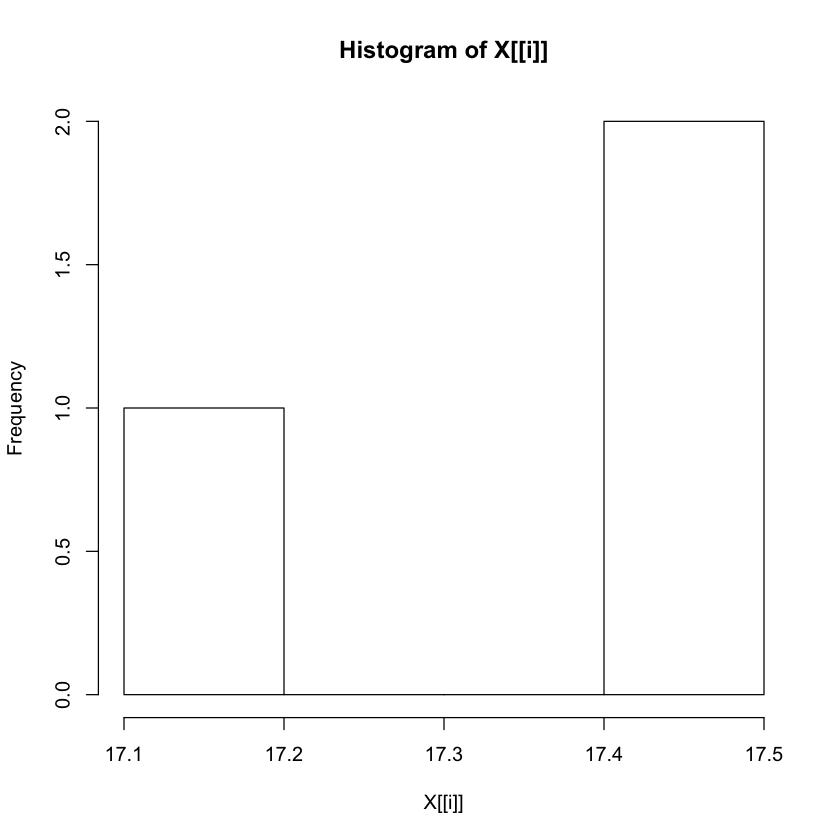

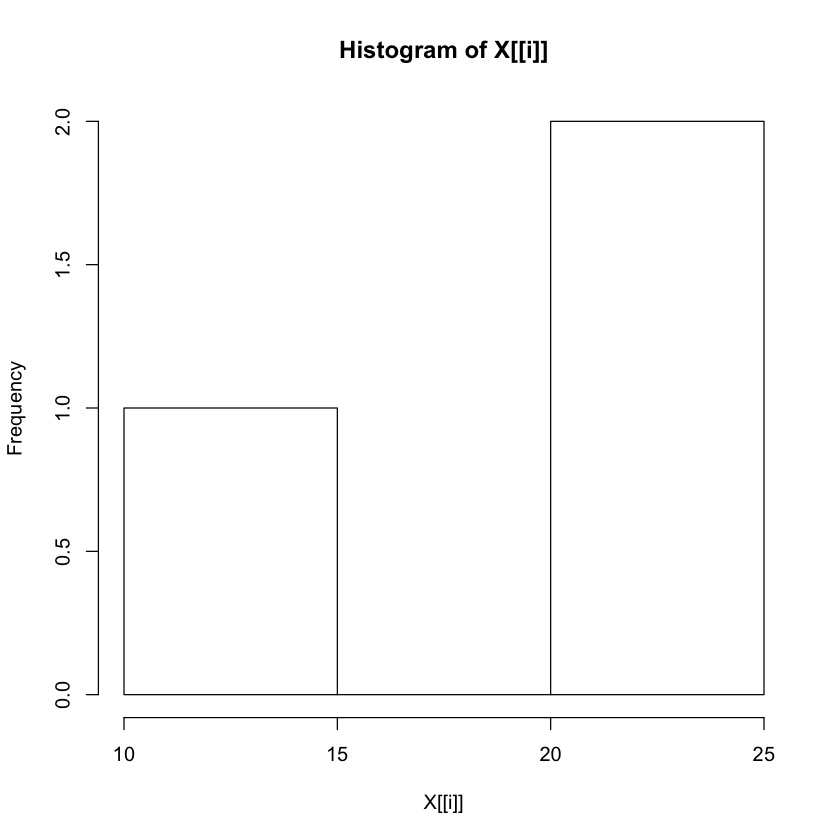

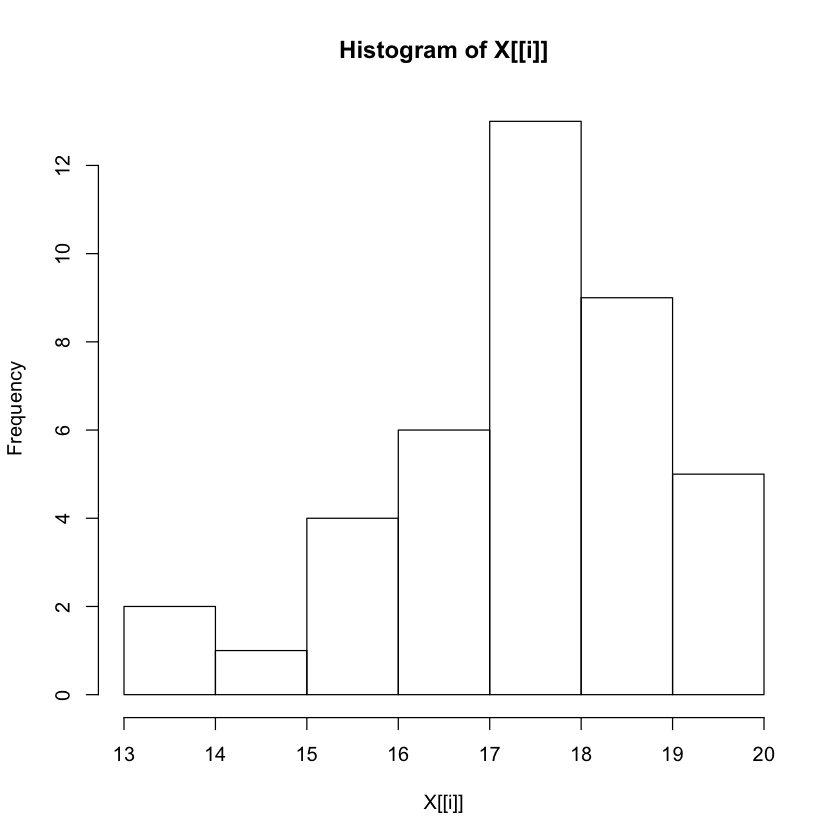

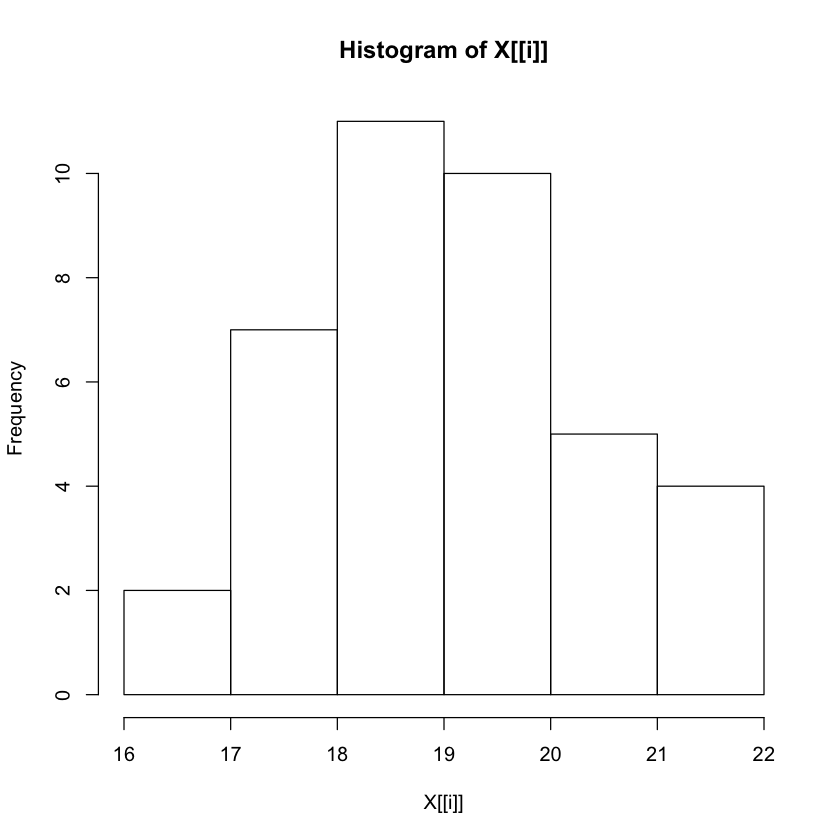

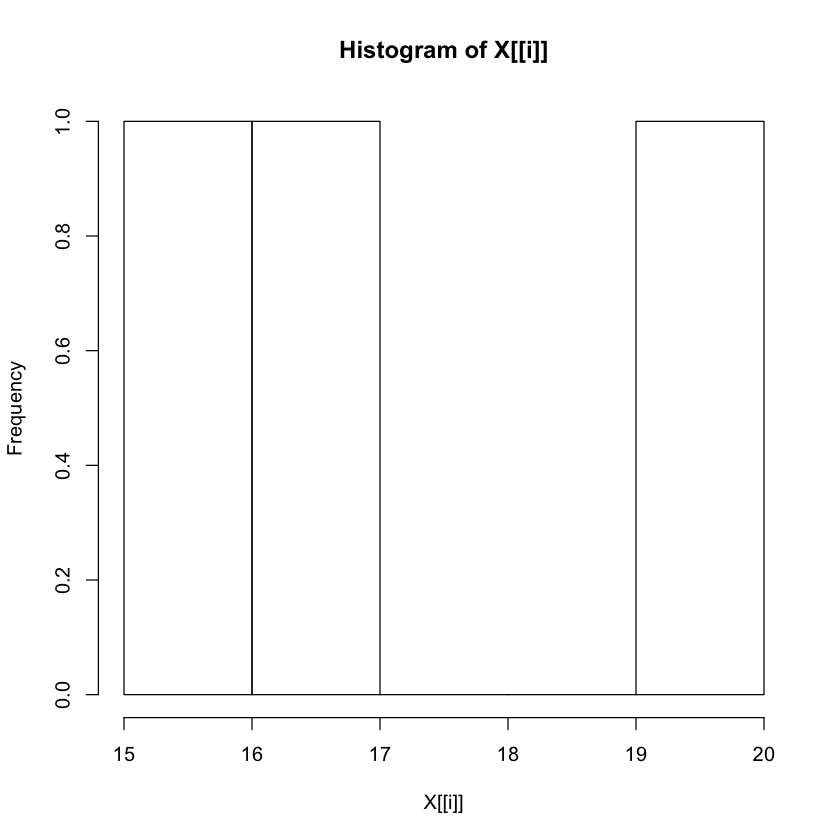

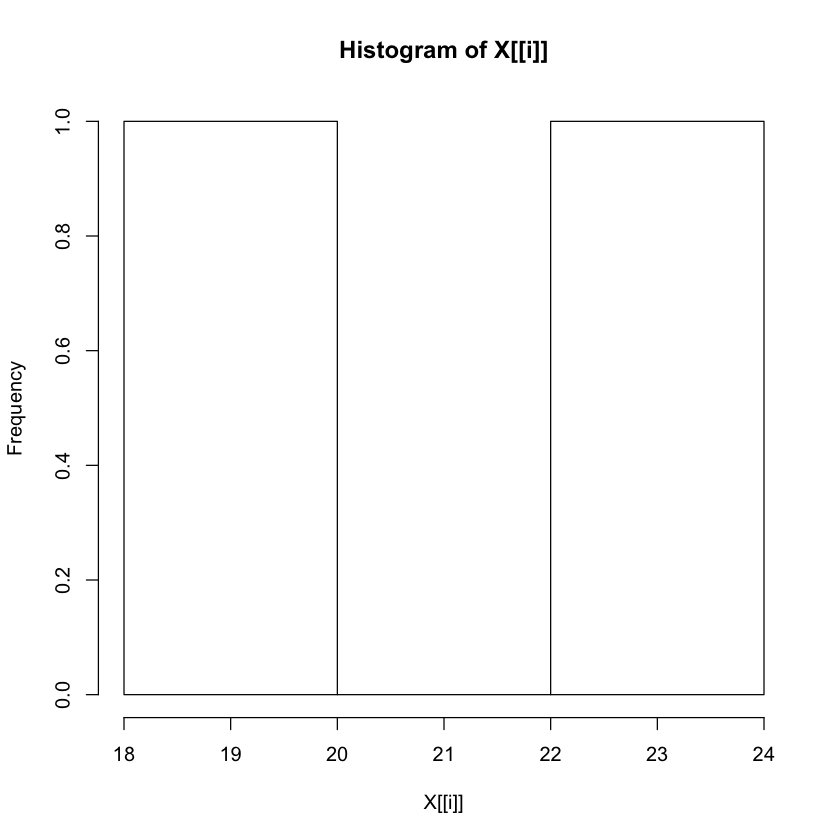

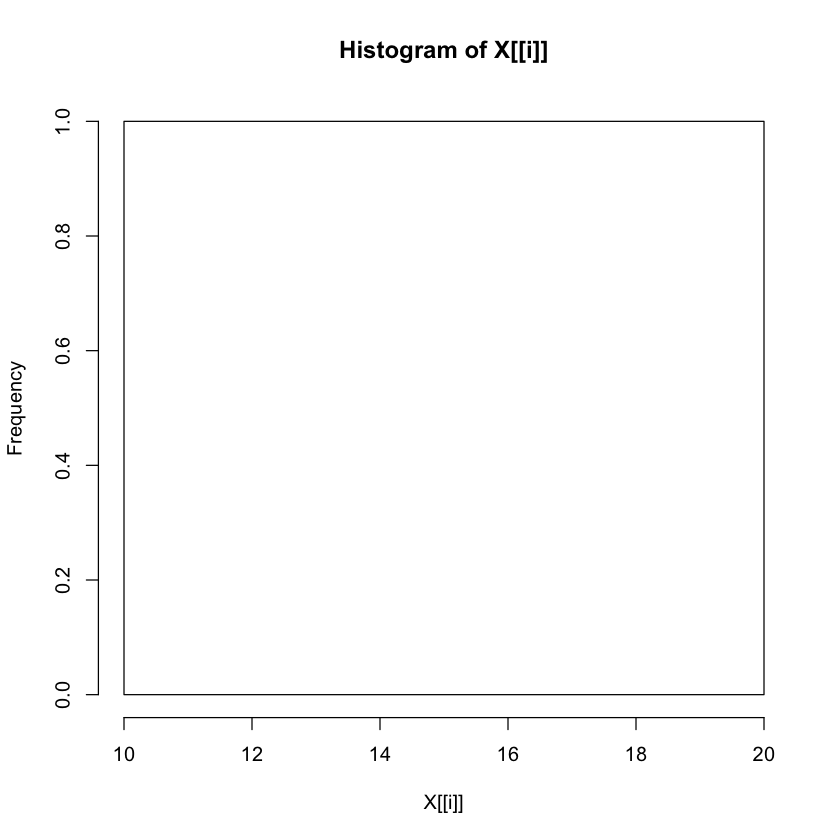

Sex,Smoke,Wr.Hnd
<fct>,<fct>,"<list[,6]>"
Female,Heavy,"17.1, 17.2, 17.3, 17.4, 17.5, 1, 0, 0, 2, 3.333333, 0.000000, 0.000000, 6.666667, 17.15, 17.25, 17.35, 17.45, X[[i]], TRUE"
Male,Heavy,"10, 15, 20, 25, 1, 0, 2, 0.06666667, 0.00000000, 0.13333333, 12.5, 17.5, 22.5, X[[i]], TRUE"
Female,Never,"13, 14, 15, 16, 17, 18, 19, 20, 2, 1, 4, 6, 13, 9, 5, 0.050, 0.025, 0.100, 0.150, 0.325, 0.225, 0.125, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, X[[i]], TRUE"
Male,Never,"16, 17, 18, 19, 20, 21, 22, 2, 7, 11, 10, 5, 4, 0.05128205, 0.17948718, 0.28205128, 0.25641026, 0.12820513, 0.10256410, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, X[[i]], TRUE"
Female,Occas,"15, 16, 17, 18, 19, 20, 1, 1, 0, 0, 1, 0.3333333, 0.3333333, 0.0000000, 0.0000000, 0.3333333, 15.5, 16.5, 17.5, 18.5, 19.5, X[[i]], TRUE"
Male,Occas,"18, 20, 22, 24, 1, 0, 1, 0.25, 0.00, 0.25, 19, 21, 23, X[[i]], TRUE"
Female,Regul,"10, 20, 1, 0.1, 15, X[[i]], TRUE"
Male,Regul,"17, 18, 19, 20, 21, 22, 23, 2, 1, 3, 2, 0, 1, 0.2222222, 0.1111111, 0.3333333, 0.2222222, 0.0000000, 0.1111111, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, X[[i]], TRUE"


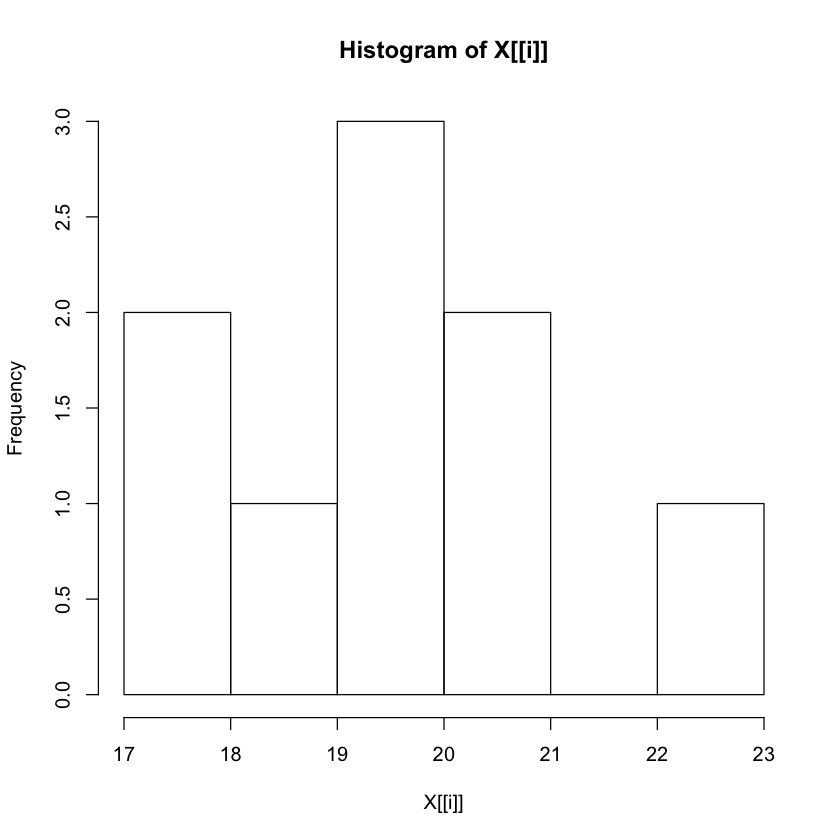

In [83]:
aggregate(Wr.Hnd~Sex+Smoke, data = data, FUN = hist)

#### d1. Categorize 'Age' - make a new binary variable 'Adult'
    ifelse(test, yes, no)

In [86]:
vec <- 1:5
vec

ifelse(vec>3, yes = "big", no = "small")

[1] 1 2 3 4 5

[1] "small" "small" "small" "big"   "big"

In [87]:
adult <- 18
data$Adult <- ifelse(data$Age>=18, "Yes", "No")
head(data)

X,Sex,Wr.Hnd,NW.Hnd,Pulse,Smoke,Height,Age,Adult
<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<chr>
1,Male,21.4,21.0,63,Never,180.00,19.000,Yes
2,Male,19.5,19.4,79,Never,165.00,18.083,Yes
3,Female,16.3,16.2,44,Regul,152.40,23.500,Yes
4,Female,15.9,16.5,99,Never,167.64,17.333,No
5,Male,19.3,19.4,55,Never,180.34,19.833,Yes
6,Male,18.5,18.5,48,Never,167.00,22.333,Yes


##### R has if (test) {opt1} else {opt2}, what is the advantage of ifelse( )?

In [88]:
if (data$Age >= 18) {
    data$Adult2 = "Yes"
} else {
    data$Adult2 = "No"
}
head(data)

Warning message in if (data$Age >= 18) {:
“the condition has length > 1 and only the first element will be used”

X,Sex,Wr.Hnd,NW.Hnd,Pulse,Smoke,Height,Age,Adult,Adult2
<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<chr>,<chr>
1,Male,21.4,21.0,63,Never,180.00,19.000,Yes,Yes
2,Male,19.5,19.4,79,Never,165.00,18.083,Yes,Yes
3,Female,16.3,16.2,44,Regul,152.40,23.500,Yes,Yes
4,Female,15.9,16.5,99,Never,167.64,17.333,No,Yes
5,Male,19.3,19.4,55,Never,180.34,19.833,Yes,Yes
6,Male,18.5,18.5,48,Never,167.00,22.333,Yes,Yes


In [89]:
# Delete Adult2
data <- subset(data, select=-c(Adult2))

##### ifelse( ) is vectorized!!!
#### d2. Categorize 'Wr.Hnd' into 5 groups - make a new categorical variable with 5 levels
    1. =< 16: Stephen Curry
    2. 16~18: Drake
    3. 18~20: Fred VanVleet
    4. 20~22: Jeremy Lin
    5. >  22: Kawhi Leonard
Can we still use ifelse( )?
    
    cut(x, breaks, labels = NULL, right = TRUE, ...)

In [91]:
cut.points <- c(0, 16, 18, 20, 22, Inf)
data$Hnd.group <- cut(data$Wr.Hnd, breaks = cut.points, right = TRUE)
head(data)
# labels as default

X,Sex,Wr.Hnd,NW.Hnd,Pulse,Smoke,Height,Age,Adult,Hnd.group
<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<chr>,<fct>
1,Male,21.4,21.0,63,Never,180.00,19.000,Yes,"(20,22]"
2,Male,19.5,19.4,79,Never,165.00,18.083,Yes,"(18,20]"
3,Female,16.3,16.2,44,Regul,152.40,23.500,Yes,"(16,18]"
4,Female,15.9,16.5,99,Never,167.64,17.333,No,"(0,16]"
5,Male,19.3,19.4,55,Never,180.34,19.833,Yes,"(18,20]"
6,Male,18.5,18.5,48,Never,167.00,22.333,Yes,"(18,20]"


In [92]:
# Set labels to false
data$Hnd.group <- cut(data$Wr.Hnd,
                      breaks = cut.points,
                      labels = F, right = TRUE)
head(data)

X,Sex,Wr.Hnd,NW.Hnd,Pulse,Smoke,Height,Age,Adult,Hnd.group
<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<chr>,<int>
1,Male,21.4,21.0,63,Never,180.00,19.000,Yes,4
2,Male,19.5,19.4,79,Never,165.00,18.083,Yes,3
3,Female,16.3,16.2,44,Regul,152.40,23.500,Yes,2
4,Female,15.9,16.5,99,Never,167.64,17.333,No,1
5,Male,19.3,19.4,55,Never,180.34,19.833,Yes,3
6,Male,18.5,18.5,48,Never,167.00,22.333,Yes,3


In [94]:
# Customized labels
label <- c("Curry", "Drake", "VanVleet", "Lin", "Leonard")
data$Hnd.group <- cut(data$Wr.Hnd,
                      breaks = cut.points,
                      labels = label, right = TRUE)
head(data)

X,Sex,Wr.Hnd,NW.Hnd,Pulse,Smoke,Height,Age,Adult,Hnd.group
<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<chr>,<fct>
1,Male,21.4,21.0,63,Never,180.00,19.000,Yes,Lin
2,Male,19.5,19.4,79,Never,165.00,18.083,Yes,VanVleet
3,Female,16.3,16.2,44,Regul,152.40,23.500,Yes,Drake
4,Female,15.9,16.5,99,Never,167.64,17.333,No,Curry
5,Male,19.3,19.4,55,Never,180.34,19.833,Yes,VanVleet
6,Male,18.5,18.5,48,Never,167.00,22.333,Yes,VanVleet


#### e1. Calculate the mean Wr.Hnd span of each Hnd.group

In [95]:
aggregate(Wr.Hnd~Hnd.group, data = data, FUN = mean)

Hnd.group,Wr.Hnd
<fct>,<dbl>
Curry,14.98000
Drake,17.37941
VanVleet,19.04634
Lin,21.12500
Leonard,22.63333


#### e2. Calcuate the mean Wr.Hnd span of each Hnd.group without using aggregate, by, tapply
        split(x, f, ...)
        lapply(X, FUN, ...)
        sapply(X, FUN, ..., simplify = TRUE)

In [97]:
# cut.points <- c(0, 16, 18, 20, 22, Inf)
Wr.Hnd.Grp <- split(data$Wr.Hnd, f = data$Hnd.group)
Wr.Hnd.Grp

$Curry
 [1] 15.9 13.0 16.0 13.0 14.0 16.0 15.5 15.4 15.0 16.0

$Drake
 [1] 16.3 17.5 17.5 18.0 17.5 16.4 17.2 17.0 17.8 18.0 18.0 17.0 16.9 16.5 17.0
[16] 17.6 16.5 17.5 17.7 17.1 18.0 17.6 17.5 17.7 17.5 17.5 18.0 18.0 16.5 17.5
[31] 17.5 17.6 17.0 18.0

$VanVleet
 [1] 19.5 19.3 18.5 19.8 18.5 20.0 18.6 18.5 19.1 19.6 19.5 19.5 18.9 18.1 19.7
[16] 18.8 19.5 18.5 19.4 18.5 19.1 18.8 20.0 19.0 19.5 19.0 18.9 19.0 18.5 18.5
[31] 19.2 18.5 19.0 18.5 19.2 19.5 18.7 18.2 19.5 19.0 19.5

$Lin
 [1] 21.4 22.0 21.0 21.0 20.5 21.0 21.5 20.8 21.3 21.5 21.0 20.5

$Leonard
[1] 22.2 23.2 22.5

In [106]:
# lapply
la <- lapply(Wr.Hnd.Grp, FUN = summary)
la
class(la)

$Curry
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   14.25   15.45   14.98   15.97   16.00 

$Drake
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.30   17.00   17.50   17.38   17.70   18.00 

$VanVleet
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.10   18.50   19.00   19.05   19.50   20.00 

$Lin
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.50   20.95   21.00   21.12   21.43   22.00 

$Leonard
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  22.20   22.35   22.50   22.63   22.85   23.20 


[1] "list"

In [107]:
# sapply
sa <- sapply(X = Wr.Hnd.Grp, FUN = summary, simplify = T)
sa
class(sa)
# See what simplify does

,Curry,Drake,VanVleet,Lin,Leonard
Min.,13.000,16.30000,18.10000,20.500,22.20000
1st Qu.,14.250,17.00000,18.50000,20.950,22.35000
Median,15.450,17.50000,19.00000,21.000,22.50000
Mean,14.980,17.37941,19.04634,21.125,22.63333
3rd Qu.,15.975,17.70000,19.50000,21.425,22.85000
Max.,16.000,18.00000,20.00000,22.000,23.20000


[1] "matrix"

In [108]:
sa <- sapply(X = Wr.Hnd.Grp, FUN = summary, simplify = F)
sa
class(sa)

$Curry
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   14.25   15.45   14.98   15.97   16.00 

$Drake
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.30   17.00   17.50   17.38   17.70   18.00 

$VanVleet
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.10   18.50   19.00   19.05   19.50   20.00 

$Lin
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.50   20.95   21.00   21.12   21.43   22.00 

$Leonard
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  22.20   22.35   22.50   22.63   22.85   23.20 


[1] "list"

In [110]:
# vapply *
# Safer than sapply(), and a little bit faster
# because FUN.VALUE has to be specified that length and type should match
# Any idea why it can be a little bit faster? Recall...
va <- vapply(Wr.Hnd.Grp, summary, FUN.VALUE = c("Min." = numeric(1),
                                                "1st Qu." = numeric(1),
                                                "Median" = numeric(1),
                                                "Mean" = numeric(1),
                                                "3rd Qu." = numeric(1),
                                                "Max." = numeric(1)))
va

,Curry,Drake,VanVleet,Lin,Leonard
Min.,13.000,16.30000,18.10000,20.500,22.20000
1st Qu.,14.250,17.00000,18.50000,20.950,22.35000
Median,15.450,17.50000,19.00000,21.000,22.50000
Mean,14.980,17.37941,19.04634,21.125,22.63333
3rd Qu.,15.975,17.70000,19.50000,21.425,22.85000
Max.,16.000,18.00000,20.00000,22.000,23.20000


#### f. Calculate the 95% sample confidence intervals of Wr.Hnd in each Smoke group.
One variable for lower bound and one variable for upper bound.

$$ CI = \bar{x} \pm t_{n-1, 0.025} \times \sqrt{\frac{s^2}{n}} $$

where $\bar{x}$ is the sample mean and $s^2$ is the sample variance.

In [49]:
# aggregate(Wr.Hnd~Smoke, data = data, FUN = ...)
# tapply(X = data$Wr.Hnd, INDEX = list(data$Smoke), FUN = ...)

##### Unfortunately, I do not know any function in R that does this calculation.
But I know how to do it step by step.

In [118]:
sample.mean <- aggregate(Wr.Hnd~Smoke, data = data, FUN = mean)$Wr.Hnd
sample.sd <- aggregate(Wr.Hnd~Smoke, data = data, FUN = sd)$Wr.Hnd
n <- aggregate(Wr.Hnd~Smoke, data = data, FUN = length)$Wr.Hnd
t <- qt(p = 0.025, df = n - 1, lower.tail = FALSE)
sample.mean; sample.sd; n; t
lb <- sample.mean - t * sample.sd / sqrt(n)
ub <- sample.mean + t * sample.sd / sqrt(n)
lb; ub
# How many times did we aggregate according to the group? Can on aggregate only once?

[1] 18.43333 18.31899 18.44000 19.30000

[1] 3.289782 1.695475 2.640644 1.882079

[1]  6 79  5 10

[1] 2.570582 1.990847 2.776445 2.262157

[1] 14.98092 17.93922 15.16121 17.95364

[1] 21.88575 18.69875 21.71879 20.64636

##### Or, we can make our own function and integrate it into aggregate( ), by( ), or tapply( ) !!!
### 2.2 Write our own functions in R
A function takes in some inputs and gives outputs

In [51]:
# The structure
func_name <- function(argument){
    statement
}

#### Example 1. Make a function for $f(x) = 2x$

In [52]:
# Build the function
times2 <- function(x) {
    fx = 2 * x
    return(fx)
}
# Use the function
times2(x = 5)
# or
times2(5)

[1] 10

[1] 10

#### Example 2. Make a function to calculate the integer division of $a$ by $b$, return the integer part and the modulus.

In [53]:
# R has operators that do this
9 %/% 2
9 %% 2

[1] 4

[1] 1

     floor( ) takes a single numeric argument x and returns a numeric vector containing the largest integers not greater than the corresponding elements of x.



In [132]:
int.div <- function(a, b){
    int <- a%/%b
    mod <- a%%b
    return(list(integer = int, modulus = mod))
}

In [133]:
# class(result)
# Recall: how do we access the modulus?
result <- int.div(21, 4)
result$integer

[1] 5

In [134]:
int.div <- function(a, b){
    int <- a%/%b
    mod <- a%%b
    return(cat(a, "%%", b, ": \n integer =", int,"\n ------------------", " \n modulus =", mod, "\n"))
}
int.div(21,4)

21 %% 4 : 
 integer = 5 
 ------------------  
 modulus = 1 


In [137]:
int.div <- function(a, b){
    int <- a%/%b
    mod <- a%%b
    return(c(a, b))
}
int.div(21, 4)

[1] 21  4

#### Example 3. Make the simplest canadian AI chatbot

In [158]:
# No need to worry about the details here.
# Just want to show that functions do not always have to return() something.
AIcanadian <- function(who, reply_to) {
    system(paste("say -v", who, "Sorry!"))
}
AIcanadian("Alex", "Sorry I stepped on your foot.")

In [160]:
# Train my chatbot - AlphaGo style.
# I'll let Alex and Victoria talk to each other.
# MacOS has their voices recorded.
chat_log <- rep(NA, 8)
# for (i in 1:8) {
#     if (i == 1) {
#         chat_log[1] <- "Sorry I stepped on your foot."
#         system("say -v Victoria Sorry, I stepped on your foot.")
#     } else {
#         if (i %% 2 == 0)
#             chat_log[i] <- AIcanadian("Alex", chat_log[i - 1])
#         else
#             chat_log[i] <- AIcanadian("Victoria", chat_log[i - 1])
#     }
# }
# chat_log

#### Example 4. Check one summary statistic by Smoke group of our 'data' data.
Function arguments can be basically anything, say another function.

In [146]:
data_summary <- function(func) {
    data <- read.csv("https://raw.githubusercontent.com/ly129/MiCM/master/sample.csv", header = TRUE)
    by(data = data$Wr.Hnd, INDICES = list(data$Smoke), FUN = func)
}
data_summary(mean)

: Heavy
[1] 18.43333
------------------------------------------------------------ 
: Never
[1] 18.31899
------------------------------------------------------------ 
: Occas
[1] 18.44
------------------------------------------------------------ 
: Regul
[1] 19.3

##### Exercise: make a function to calculate sample confidence intervals (2.1 f)

In [157]:
# sample.mean <- NULL
# sample.sd <- NULL
# n <- NULL
# t <- qt(p = 0.025, df = n - 1, lower.tail = FALSE)
# lb <- sample.mean - t * sample.sd / sqrt(n)
# ub <- sample.mean + t * sample.sd / sqrt(n)

sample_CI <- function(x) {
    m <- mean(x)
    l <- length(x)
    s <- sd(x)
    t <- qt(p = .025, df = l - 1, lower.tail = FALSE)
    lb <- m - t* s / sqrt(l)
    ub <- m + t * s / sqrt(l)
    return(c(LowerBound = lb, UpperBound = ub))
}

aggregate(Wr.Hnd~Smoke, data = data, FUN = sample_CI)

Smoke,Wr.Hnd
<fct>,"<dbl[,2]>"
Heavy,"14.98092, 21.88575"
Never,"17.93922, 18.69875"
Occas,"15.16121, 21.71879"
Regul,"17.95364, 20.64636"


<a id='3'></a>
## 3. [Efficient computing](#0)
We often want to minimize the resources used to do certain computation.
##### Time is usually the most important resource.
Other resources are relatively less important.
### 3.1 Parallel computing
When multiple tasks are independent of each other. We can use (up to) all the CPU cores at the same time to do the tasks simultaneously. Check CPU usage if interested.

In [60]:
library(parallel)
detectCores()

[1] 4

In [61]:
mat.list <- sapply(c(1, 5, 200, 250, 1800, 2000), diag)
print(head(mat.list, 2)) # print() makes the output here look the same as in R/Rstudio

[[1]]
     [,1]
[1,]    1

[[2]]
     [,1] [,2] [,3] [,4] [,5]
[1,]    1    0    0    0    0
[2,]    0    1    0    0    0
[3,]    0    0    1    0    0
[4,]    0    0    0    1    0
[5,]    0    0    0    0    1



#### Here we compare lapply( ) and its multi-core version mclapply( ) and parLapply( ) in the 'parallel' package.
    - lapply()
    - mclapply(..., mc.preschedule = TRUE)   # without load balancing
    - mclapply(..., mc.preschedule = FALSE)  # with load balancing
    
_mcapply( ) sets up a pool of mc.cores workers just for this computation_

_mclapply( ) is not available on Windows. For those of you using Windows computers_

https://www.apple.com/ca/mac/ or https://ubuntu.com or

    - parLapply                              # without load balancing
    - parLapplyLB                            # with load balancing

To use parLapply( ), we need to set up a cluster, and we need to close the cluster after we are done. The good part is that we can put several parLapply( ) calls within the cluster.

In [62]:
system.time(
    sc <- lapply(mat.list, solve)
)

   user  system elapsed 
  2.919   0.054   2.978 

In [63]:
system.time(
    mc <- mclapply(mat.list, solve, mc.preschedule = TRUE, mc.cores = 3)
)

   user  system elapsed 
  1.292   0.167   1.861 

In [64]:
system.time(
    mc <- mclapply(mat.list, solve, mc.preschedule = FALSE, mc.cores = 3)
)

   user  system elapsed 
  1.291   0.195   1.878 

In [65]:
t <- proc.time()
cl <- makeCluster(3) # Use 3 cores
pl <- parLapply(cl = cl, X = mat.list, fun = solve)
stopCluster(cl)
proc.time() - t

   user  system elapsed 
  0.386   0.090   4.197 

In [66]:
t <- proc.time()
cl <- makeCluster(3)
pl <- parLapplyLB(cl = cl, X = mat.list, fun = solve)
stopCluster(cl)
proc.time() - t

   user  system elapsed 
  0.499   0.121   3.490 

In [67]:
# Two parallel calls within one cluster.
t <- proc.time()
cl <- makeCluster(3)
pl_nb <- parLapply(cl = cl, X = mat.list, fun = solve)
pl_lb <- parLapplyLB(cl = cl, X = mat.list, fun = solve)
stopCluster(cl)
proc.time() - t
# This takes shorter than the sum of the previous two. Why?

   user  system elapsed 
  0.868   0.154   7.513 

##### For both mclapply( ) and parLapply( ), setting up parallel computing takes time (overhead).

In [68]:
t <- proc.time()
cl <- makeCluster(3)
stopCluster(cl)
proc.time() - t

   user  system elapsed 
  0.010   0.006   0.720 

##### Load-balancing is tricky.
"Load balancing is potentially advantageous when the tasks take quite dissimilar amounts of computation time, or where the nodes are of disparate capabilities."

If 1000 tasks need to be allocated to 10 nodes (CPUs, cores, etc.)
- without load-balancing, 100 tasks are sent to each of the nodes.
- with load-balancing, tasks are sent to a node one at a time. Overhead is high.

##### Take-home message
- Parallel computing exists in R
- They are not faster than non-parallel computing by a factor of number of cores used.
- R is still slow.

##### The solution is lower-level programming languages.
- C
- C++
- Fortran

### 3.2 Integration with C++
__The 'Rcpp' package__
    - "Seamless R and C++ Integration"
    
1. Install 'Rcpp' package in R
2. Install compiler
    - Windows: Rstudio should ask you to install Rtools when you source your cpp code.
        - If not, you can download and install Rtools on the exact same webpage where you downloaded R.
    - MacOS:
        - Install XCode Command Line Tools. Open Terminal, paste and run
                xcode-select --install
        - Install gfortran-6.1 binary and clang compiler (also on the exact same webpage as the R download)
        
            https://cran.r-project.org/bin/macosx/tools/
            
    _“Setup is extra work on macOS, but it is above our pay grade to change that.” - Dirk Eddelbuettel_
         https://github.com/RcppCore/RcppArmadillo/issues/249
3. File -> New File -> C++ File
4. Code C++
    - Try not to forget ';' at the end of lines;
    - Every object that has ever appeared has to be defined;
    - Have to use loops to do a lot of things such as matrix calculations (not slow though);

#### Example 1. Create an R function that calculates the square root of vectors in C++.

In [69]:
library(Rcpp)
sourceCpp("sqrt_cpp.cpp")
square_root(1:4)
# We return a NumericVector in the .cpp file. So we get an R vector.

[1] 1.000000 1.414214 1.732051 2.000000

__The addition of the 'RcppArmadillo' package__
      - "Armadillo is a C++ linear algebra library aiming towards a good balance between speed and ease of use."
http://arma.sourceforge.net

___Linear algebra in Armadillo___
http://arma.sourceforge.net/armadillo_joss_2016.pdf

In base C++, operations like matrix multiplication requires loops.
#### Example 2. Create an R function that calculates matrix multiplication in C++.

In [70]:
sourceCpp("mm_cpp.cpp")

In [71]:
# Now we can call the function using the name defined in the .cpp file
set.seed(20190813)
a <- matrix(rnorm(100000), ncol = 50000)  # 2 x 50000 matrix
b <- matrix(rnorm(200000), nrow = 50000)  # 50000 x 4 matrix

mat_mul(a, b)
# We return an Rcpp::List in the .cpp file. So we get an R list here.
# mat_mul(b, a)

-345.3068,359.6366,-54.33261,-182.1485
-190.4709,85.7216,-330.53902,121.1807


In [72]:
bchmk <- microbenchmark(a %*% b,
                        mat_mul(a, b),
                        unit = "us", times = 100
                       )
summary(bchmk)

expr,min,lq,mean,median,uq,max,neval
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a %*% b,738.83,743.7275,775.0459,754.637,786.785,973.247,100
"mat_mul(a, b)",586.69,588.0115,614.3580,590.760,614.089,1637.623,100


In [73]:
# Here we make an R function that calls the C++ function
mmc <- function(a, b) {
    result <- mat_mul(a, b)$MatrixMultiplication
    return(result)
}
mmc(a, b)

-345.3068,359.6366,-54.33261,-182.1485
-190.4709,85.7216,-330.53902,121.1807


In [74]:
# Another way to do this. Here you do not need to have a separate .cpp file.
# A naive .cpp function is made here.
library(RcppArmadillo)
cppFunction(depends = "RcppArmadillo",
            code = 'arma::mat mm(arma::mat& A, arma::mat& B){
                        return A * B;
                    }'
)

In [75]:
mm(a, b)
# mm(b, a)

-345.3068,359.6366,-54.33261,-182.1485
-190.4709,85.7216,-330.53902,121.1807


In [76]:
# We can wrap this naive function in an R function to manipulate input and output in R
mmc2 <- function(A, B) {
    if (ncol(A) == nrow(B)) {
        return(mm(A, B))
    } else {
        stop("non-conformable arguments")
    }
}
mmc2(a, b)
# mmc2(b, a)

-345.3068,359.6366,-54.33261,-182.1485
-190.4709,85.7216,-330.53902,121.1807


### 3.3 Integration with Fortran
- Old but even faster
    - We will see that Fortran sacrifices a LOT for speed.
- Require a compiler too
    - MacOS
        - You might have noticed that we have installed a compiler called gfortran
    - Windows
        - A lot of work. See "Fortran_Setup_Win.txt". https://github.com/ly129/MiCM/blob/master/Fortran_Setup_Win.txt
- R can call fortran subroutines
    - Basically a kind of function
    - Through a .so file (Shared Object, MacOS) and a .dll file (Dynamic Link Library, Windows)
        - MacOS Terminal
                cd file_path
                R CMD SHLIB -o file_name.so file_name.f90
        - Windows Command Prompt
                cd file_path
                gfortran -shared -o file_name.dll file_name.f90
- Requires pointers for communication between programs
    - Pointers point to a locations on the computer's memory
        - Two different programs cannot share data directly.
    - The same applies to C++. 'Rcpp' package handles it for us.
    - Test your program in Fortran. The communication between programs make it hard to debug.
        - Make a Fortran program. Then in terminal/command prompt, type
                cd file_path
                gfortran file_name.f90
                ./a.out (MacOS) | a.exe (Windows)

In [77]:
set.seed(20190813)

ra <- 2
ca <- 4
rb <- 4
cb <- 3

A <- matrix(rnorm(ra*ca), nrow = ra)
B <- matrix(rnorm(rb*cb), nrow = rb)

A; B

-0.7265744,0.3488403409,-1.56818199,0.47863529
-1.0882637,-0.0002502522,0.03957236,0.01071728


-3.1124977,1.1331331,-0.1618750
-0.4561366,-0.6835550,0.6946241
-1.5031855,0.1793388,-0.5950162
0.5016549,0.3443689,-0.1799074


In [78]:
# Load the executable .so file (MacOS) or .dll file (Windows)
dyn.load("mm_for.so")

In [79]:
# Check whether the "mat_mul_for" function is loaded into R
is.loaded("mat_mul_for")

[1] TRUE

In [80]:
result <- .Fortran("mat_mul_for",
                   A = as.double(A),
                   B = as.double(B),
                   AB = double(ra * cb),  # note the difference here
                   RowA = as.integer(ra),
                   ColA = as.integer(ca),
                   RowB = as.integer(rb),
                   ColB = as.integer(cb),
                   RowAB = as.integer(ra),
                   ColAB = as.integer(cb)
)
result
class(result)

$A
[1] -0.7265743596 -1.0882637317  0.3488403409 -0.0002502522 -1.5681819905
[6]  0.0395723591  0.4786352927  0.0107172815

$B
 [1] -3.1124977 -0.4561366 -1.5031855  0.5016549  1.1331331 -0.6835550
 [7]  0.1793388  0.3443689 -0.1618750  0.6946241 -0.5950162 -0.1799074

$AB
[1]  4.6997204  3.3332243 -1.1781657 -1.2221891  1.2069107  0.1505145

$RowA
[1] 2

$ColA
[1] 4

$RowB
[1] 4

$ColB
[1] 3

$RowAB
[1] 2

$ColAB
[1] 3

[1] "list"

#### We can wrap it in an R function as well.

In [81]:
mmf <- function(A, B) {
    ra <- nrow(A)
    ca <- ncol(A)
    rb <- nrow(B)
    cb <- ncol(B)
    
    if (ca == rb) {
        result <- .Fortran("mat_mul_for",
                            A = as.double(A),
                            B = as.double(B),
                            AB = double(ra * cb),
                            RowA = as.integer(ra),
                            ColA = as.integer(ca),
                            RowB = as.integer(rb),
                            ColB = as.integer(cb),
                            RowAB = as.integer(ra),
                            ColAB = as.integer(cb)
                            )
        mm <- matrix(result$AB, nrow = result$RowAB, byrow = F)
    } else {
        stop('non-conformable arguments')
    }
    return(list(Result = mm,
                Dimension = c(result$RowAB, result$ColAB)
               )
          )
}

In [82]:
set.seed(20190813)

ra <- 2
ca <- 50000
rb <- 50000
cb <- 3

A <- matrix(rnorm(ra*ca), nrow = ra)
B <- matrix(rnorm(rb*cb), nrow = rb)

mmf(A, B)

-345.3068,359.6366,-54.33261
-190.4709,85.7216,-330.53902


In [83]:
A %*% B

-345.3068,359.6366,-54.33261
-190.4709,85.7216,-330.53902


<a id='4'></a>
## 4. [Exercises](#0)
Make a function in R using R and/or Rcpp and/or R call Fortran that does

__Level 1__ Integer division of two integers using a loop

        I have 9 dollars to buy donuts for my colleagues. The donuts are 2 dollars each.
$$ 9>2 \rightarrow 9-2 = 7\quad \mathrm{1\, donut} $$
$$ 7>2 \rightarrow 7-2 = 5\quad \mathrm{2\, donuts}  $$
$$ 5>2 \rightarrow 5-2 = 3\quad \mathrm{3\, donuts}  $$
$$ 3>2 \rightarrow 3-2 = 1\quad \mathrm{4\, donuts}  $$
$$ 1<2 \rightarrow \mathrm{stop} $$

In [84]:
# Something like this.
9 %/% 2; 9%%2

[1] 4

[1] 1

__Level 2__ Element-wise integer division for two integer vectors

In [85]:
# Something like this.
c(15, 14, 13, 12) %/% c(6, 5, 4, 3)
c(15, 14, 13, 12) %% c(6, 5, 4, 3)

[1] 2 2 3 4

[1] 3 4 1 0

_If you like loops, loops in C++ and Fortran are fast._

__Level 3__ Linear regression

The formula for the point estimates is
$$ \boldsymbol{\beta} = (\boldsymbol{X}^\top \boldsymbol{X})^{-1} \boldsymbol{X}^\top \boldsymbol{Y} $$

- matrix transpose in R: t(X)
- matrix inverse in R: solve(X)
- matrix-matrix and matrix-vector mulplication in R: X %*% Y

In [86]:
# If you enter the right X and Y in your function, you should get the following result
lm(Wr.Hnd~NW.Hnd+Age, data = data)


Call:
lm(formula = Wr.Hnd ~ NW.Hnd + Age, data = data)

Coefficients:
(Intercept)       NW.Hnd          Age  
     1.1109       0.9535      -0.0103  


__Level 4__ Gradient descent to calculate the minimum value of a given function, with user-supplied gradient function.
- Gradient descent is an iterative algorithm therefore we have to use loops. Here we can really see the speed advantage of C++ and Fortran over R.

In [87]:
# Something like this, both inputs are R functions.
GD <- function(objective_function, gradient_function, initial_value) {
    statements
}

__Level 5__ Specific task in your own research.